Cross Validation Scores:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Average CV Score:  0.9800000000000001
Best Parameters: {'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



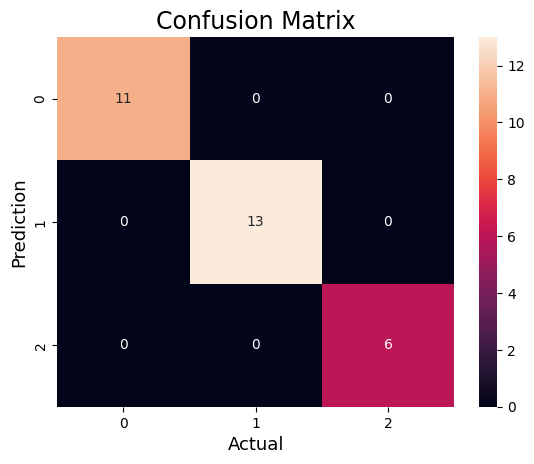

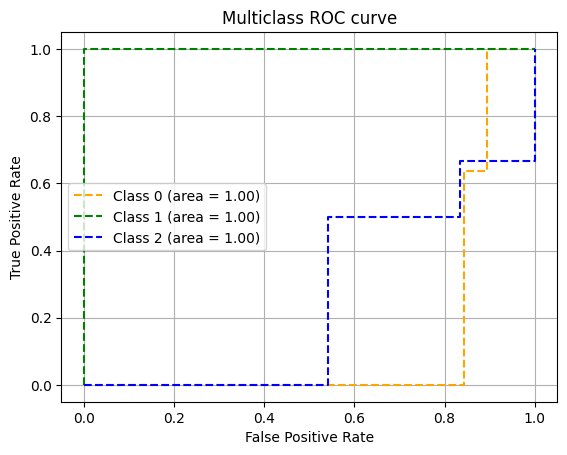

In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV  
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

def plot_sklearn_roc_curve(y_real, y_pred):
  # roc curve for classes
  fpr = {}
  tpr = {}  
  thresh = {}
  n_class = 3

  for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_real, y_pred, pos_label=i)

  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 (area = %.2f)' %score)
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 (area = %.2f)' %score)
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 (area = %.2f)' %score)
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.grid()
  plt.legend()
  plt.show()

dataset = pd.read_csv("https://raw.githubusercontent.com/phattarin-kitbumrung/machinelearning-python/dataset/main/iris.csv")

# train & test set
x = dataset.drop(['Id', 'Species'], axis=1)
y = dataset['Species']
# dividing dataset in to train test 80% - 20%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# training
param_grid = {'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
model = GridSearchCV(svm.SVC(probability=True), param_grid)
stratified_kfold = StratifiedKFold(n_splits = 5)
cross_validation_score = cross_val_score(model, x, y, cv = stratified_kfold)
print("Cross Validation Scores: ", cross_validation_score)
print("Average CV Score: ", cross_validation_score.mean())
model.fit(x_train,y_train)
print('Best Parameters:', model.best_params_)
print("\n")

# test
y_pred = model.predict(x_test)

# result
y_pred_proba = model.predict_proba(x_test)
score = model.score(x_test, y_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

#Plot the confusion matrix.
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
print("\n")

# Plots the ROC curve using the sklearn methods - Good plot
y_list = dataset.groupby(['Species']).count()
y_list_key = y_list.index
y_list_integer = []
for i in range(0,len(y_list_key)):
  y_list_integer.append(i)
y_test_format = y_test.replace(y_list_key, y_list_integer, regex=True)
plot_sklearn_roc_curve(y_test_format, y_pred_proba[:, 1])
